<a href="https://colab.research.google.com/github/James-R-Chapman/DS-Unit-2-Kaggle-Challenge/blob/master/James_Chapman_LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                              stratify=train['status_group'], random_state=42)
train.shape, val.shape, test.shape

((38016, 41), (9504, 41), (14358, 40))

In [0]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
17326,21622,0.0,2013-01-31,Private Person,-16,Artisan,39.262792,-8.583836,Kisima Cha Mwarabu,0,Ruvuma / Southern Coast,Kibaoni,Lindi,80,13,Kilwa,Miteja,1,True,GeoData Consultants Ltd,NaN,NaN,True,2011,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,non functional
53246,25861,0.0,2011-03-16,Government Of Tanzania,1811,DWE,38.261165,-4.590888,Kwa Mzee Muddy Hassani,0,Pangani,Mazungui,Tanga,4,1,Lushoto,Malindi,1,True,GeoData Consultants Ltd,VWC,NaN,True,2010,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
52654,46059,500.0,2013-10-02,Danida,506,DANIDA,34.633337,-11.001642,Kampala,0,Lake Nyasa,Njambe,Ruvuma,10,3,Mbinga,Kihagara,90,True,GeoData Consultants Ltd,VWC,DANIDA,True,1992,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
13335,53465,0.0,2011-03-22,Lvia,0,LVIA,36.144968,-6.037609,Schools,0,Wami / Ruvu,Muungano,Dodoma,1,4,Chamwino,Chilionwa,0,True,GeoData Consultants Ltd,VWC,Nzal,True,0,windmill,wind-powered,wind-powered,vwc,user-group,unknown,unknown,soft,good,dry,dry,other,other,unknown,communal standpipe multiple,communal standpipe,non functional
2743,69528,0.0,2011-02-19,Luthe,2334,Commu,34.097641,-9.218276,none,0,Lake Nyasa,Matula,Iringa,11,3,Makete,Iwawa,0,True,GeoData Consultants Ltd,VWC,Ivalal,False,1978,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [0]:
import numpy as np

def wrangle(X):
    """Wrangles train, validate, and test sets in the same way"""
    X = X.copy()

    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']    
    
    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)
    
    # Drop duplicate columns
    duplicate_columns = ['quantity_group']
    X = X.drop(columns=duplicate_columns)
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these like null values
    X['latitude'] = X['latitude'].replace(-2e-08, np.nan)
    
    # When columns have zeros and shouldn't, they are like null values
    cols_with_zeros = ['construction_year', 'longitude', 'latitude', 'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
train.shape, val.shape, test.shape

((38016, 41), (9504, 41), (14358, 40))

In [0]:
target = 'status_group'
train_features = train.drop(columns=[target])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 50].index.tolist()
features = numeric_features + categorical_features

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

print(X_train.shape, X_val.shape)

(38016, 33) (9504, 33)


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier


In [0]:
#Try a Random Forest Classifier.
%%time
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

#fitment
pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.8006102693602694
CPU times: user 21 s, sys: 340 ms, total: 21.3 s
Wall time: 12.5 s


In [0]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['onehotencoder']
encoded_df = encoder.transform(X_train)

print('X_train shape after encoding', encoded_df.shape)

X_train shape before encoding (38016, 33)
X_train shape after encoding (38016, 183)


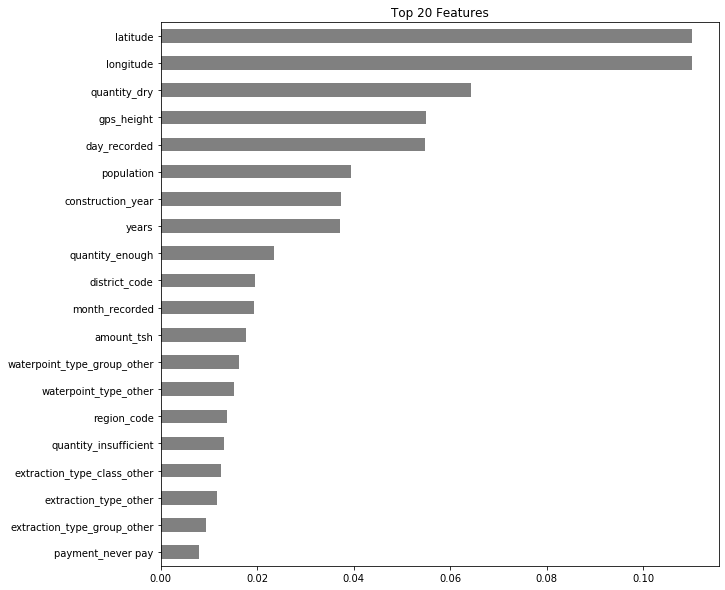

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded_df.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
#Try Ordinal Encoding.
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

print(X_train.shape, X_val.shape)

(38016, 40) (9504, 40)


In [0]:
X_train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,day_recorded,years
17326,0.0,Private Person,-16.0,Artisan,39.262792,-8.583836,Kisima Cha Mwarabu,0,Ruvuma / Southern Coast,Kibaoni,Lindi,80,13,Kilwa,Miteja,1.0,True,NaN,NaN,True,2011.0,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,shallow well,shallow well,groundwater,other,other,2013,1,31,2
53246,0.0,Government Of Tanzania,1811.0,DWE,38.261165,-4.590888,Kwa Mzee Muddy Hassani,0,Pangani,Mazungui,Tanga,4,1,Lushoto,Malindi,1.0,True,VWC,NaN,True,2010.0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2011,3,16,1
52654,500.0,Danida,506.0,DANIDA,34.633337,-11.001642,Kampala,0,Lake Nyasa,Njambe,Ruvuma,10,3,Mbinga,Kihagara,90.0,True,VWC,DANIDA,True,1992.0,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013,10,2,21
13335,0.0,Lvia,NaN,LVIA,36.144968,-6.037609,Schools,0,Wami / Ruvu,Muungano,Dodoma,1,4,Chamwino,Chilionwa,NaN,True,VWC,Nzal,True,NaN,windmill,wind-powered,wind-powered,vwc,user-group,unknown,unknown,soft,good,dry,other,other,unknown,communal standpipe multiple,communal standpipe,2011,3,22,2011
2743,0.0,Luthe,2334.0,Commu,34.097641,-9.218276,none,0,Lake Nyasa,Matula,Iringa,11,3,Makete,Iwawa,NaN,True,VWC,Ivalal,False,1978.0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011,2,19,33


In [0]:
%%time
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.803030303030303
CPU times: user 17.4 s, sys: 93.2 ms, total: 17.5 s
Wall time: 9.42 s


In [0]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
encoded_df = encoder.transform(X_train)

print('X_train shape after encoding', encoded_df.shape)

X_train shape before encoding (38016, 40)
X_train shape after encoding (38016, 40)


In [0]:
encoded_df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,day_recorded,years
17326,0.0,1,-16.0,1,39.262792,-8.583836,1,0,1,1,1,80,13,1,1,1.0,1,1,1,1,2011.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2013,1,31,2
53246,0.0,2,1811.0,2,38.261165,-4.590888,2,0,2,2,2,4,1,2,2,1.0,1,2,1,1,2010.0,2,2,2,1,1,1,1,1,1,2,1,1,1,2,2,2011,3,16,1
52654,500.0,3,506.0,3,34.633337,-11.001642,3,0,3,3,3,10,3,3,3,90.0,1,2,2,1,1992.0,3,3,3,1,1,2,2,1,1,2,2,2,1,3,3,2013,10,2,21
13335,0.0,4,NaN,4,36.144968,-6.037609,4,0,4,4,4,1,4,4,4,NaN,1,2,3,1,NaN,4,4,4,1,1,3,3,1,1,1,3,3,2,4,3,2011,3,22,2011
2743,0.0,5,2334.0,5,34.097641,-9.218276,5,0,3,5,5,11,3,5,5,NaN,1,2,4,2,1978.0,3,3,3,1,1,1,1,1,1,2,2,2,1,3,3,2011,2,19,33


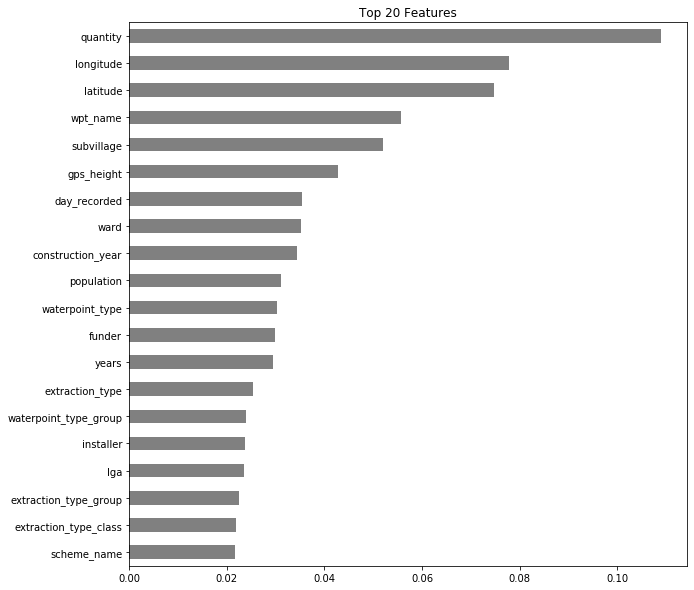

In [0]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded_df.columns)

n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='grey');